---
image: dashboarding.png
title: Data analysis for reporting
#subtitle: 
date: '2024-03-16'
categories: [dashboarding, Data Analysis, streamlit]
author: Kunal Khurana
jupyter: python3
toc: True
---

In [ ]:
! pip install streamlit

In [ ]:
!pip install altair

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
import streamlit as st
import altair as alt

wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 



In [13]:
df= pd.read_excel("//kaggle//input//fenix-shipping-data//bi5EoWE9QkiqEMz37MceAw_2edba123616f40909cb8896b374a31a1_Fenix-Shipping-Data.xlsx")

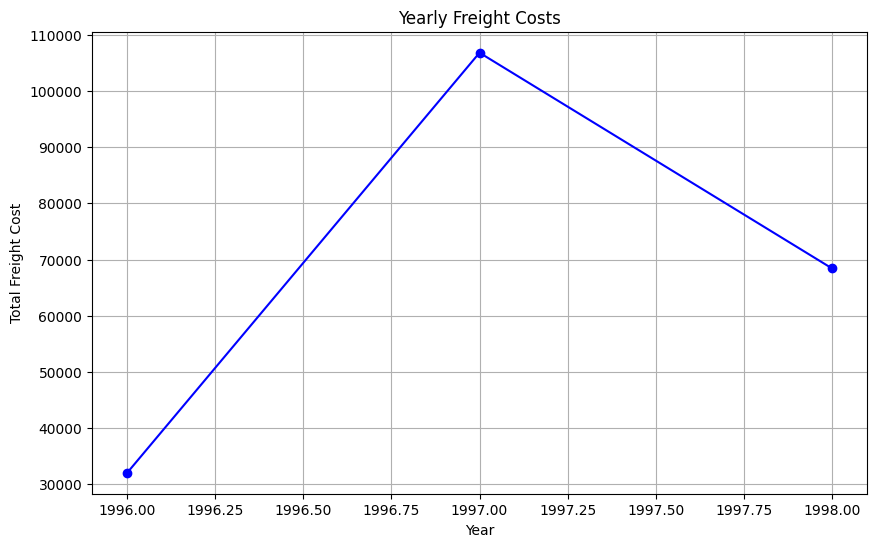

In [6]:
# Extract year from order_date and calculate yearly freight costs
yearly_freight_costs = df.groupby(df['order_date'].dt.year)['freight'].sum()

# Creating the Yearly Freight Costs line chart
plt.figure(figsize=(10, 6))
yearly_freight_costs.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Yearly Freight Costs')
plt.xlabel('Year')
plt.ylabel('Total Freight Cost')
plt.grid(True)

plt.show()


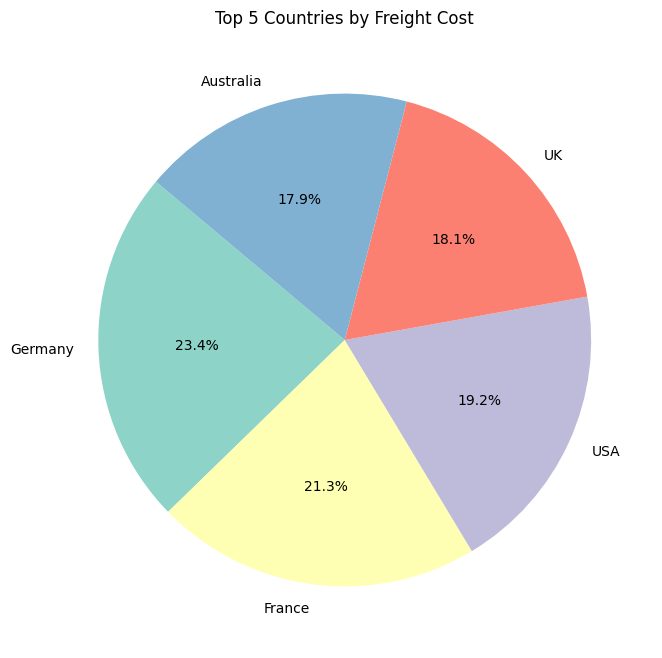

In [14]:
# Calculate total freight costs by country and select the top 5 countries
top_countries_freight = df.groupby('country')['freight'].sum().sort_values(ascending=False).head(5)

# Creating the Top 5 Countries by Freight Cost pie chart
plt.figure(figsize=(8, 8))
top_countries_freight.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Countries by Freight Cost')
plt.ylabel('')  # Hide the y-label

plt.show()


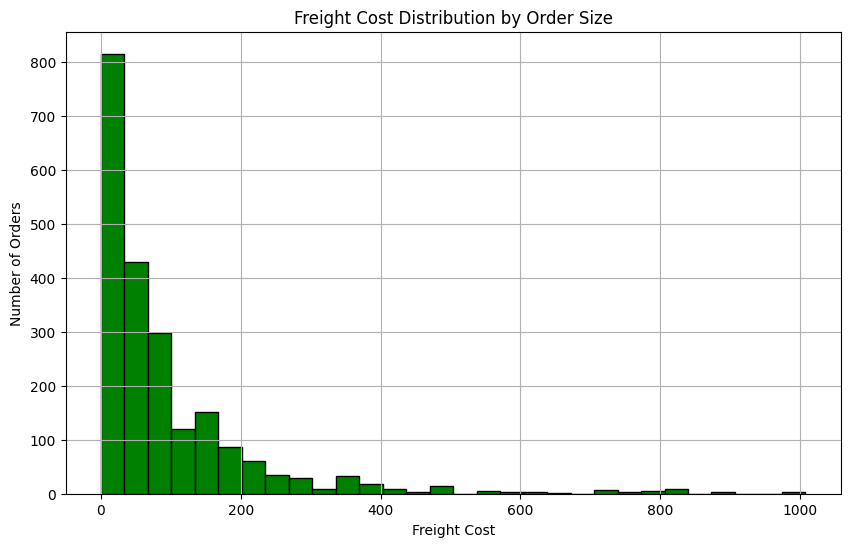

In [15]:
# Creating the Freight Cost Distribution by Order Size histogram
plt.figure(figsize=(10, 6))
df['freight'].plot(kind='hist', bins=30, color='green', edgecolor='black')
plt.title('Freight Cost Distribution by Order Size')
plt.xlabel('Freight Cost')
plt.ylabel('Number of Orders')
plt.grid(True)

plt.show()


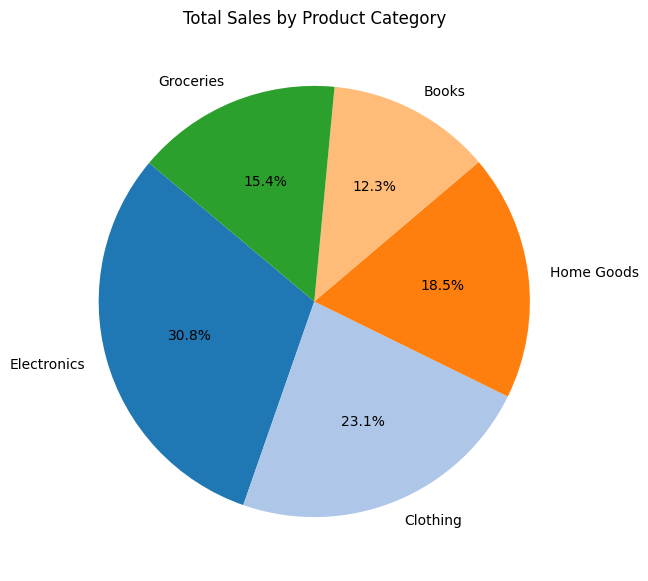

In [16]:
# Hypothetical sales data by product category
product_categories = ['Electronics', 'Clothing', 'Home Goods', 'Books', 'Groceries']
sales_volumes = [20000, 15000, 12000, 8000, 10000]

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(sales_volumes, labels=product_categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Total Sales by Product Category')
plt.show()


In [20]:
# Convert order_date to datetime if not already in that format
df['order_date'] = pd.to_datetime(df['order_date'])

# Calculate total freight costs
total_freight = df['freight'].sum()

# Analyze sales (freight) over time - monthly
monthly_sales = df.set_index('order_date')['freight'].resample('M').sum()

total_freight, monthly_sales

(207306.09999999998,
 order_date
 1996-07-31     4000.88
 1996-08-31     4348.43
 1996-09-30     3307.37
 1996-10-31     5423.29
 1996-11-30     5985.35
 1996-12-31     9006.21
 1997-01-31     7022.50
 1997-02-28     5099.44
 1997-03-31     6617.18
 1997-04-30     9977.39
 1997-05-31    12271.50
 1997-06-30     5514.03
 1997-07-31     8621.37
 1997-08-31     9686.56
 1997-09-30    10934.76
 1997-10-31    14047.60
 1997-11-30     6040.46
 1997-12-31    10959.28
 1998-01-31    19027.55
 1998-02-28    10541.08
 1998-03-31    16112.59
 1998-04-30    20186.53
 1998-05-31     2574.75
 Freq: ME, Name: freight, dtype: float64)

DeltaGenerator()

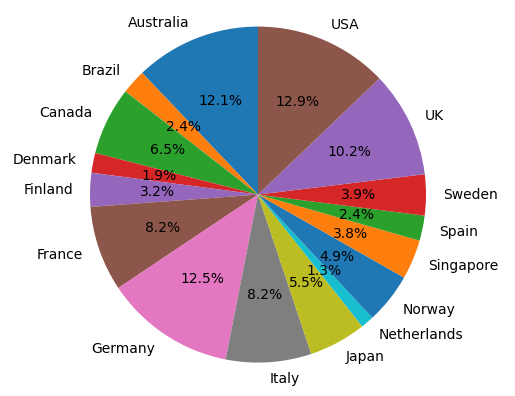

In [13]:

# Aggregate data to count orders by country
orders_by_country = df.groupby('country').size().reset_index(name='order_count')

# Create pie chart
fig, ax = plt.subplots()
ax.pie(orders_by_country['order_count'], labels=orders_by_country['country'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
st.title('Distribution of Orders by Country')
st.pyplot(fig)


In [24]:
# Sidebar filters
st.sidebar.header('Filters')
date_range = st.sidebar.date_input("Date range", [])
ship_via = st.sidebar.multiselect('Ship Via', options=df['ship_via'].unique())

# Filter the data based on selections
filtered_data = df.copy()
if date_range:
    filtered_data = filtered_data[(filtered_data['order_date'] >= date_range[0]) & (filtered_data['order_date'] <= date_range[1])]
if ship_via:
    filtered_data = filtered_data[filtered_data['ship_via'].isin(ship_via)]

# Group data by region
orders_per_region = filtered_data.groupby('region')['order_id'].nunique().reset_index()

# Chart: Orders per Region
chart = alt.Chart(orders_per_region).mark_bar().encode(
    x='region:N',
    y='order_id:Q',
    tooltip=['region', 'order_id']
).properties(width=600, height=400, title='Orders per Region')

st.altair_chart(chart, use_container_width=True)


DeltaGenerator()